In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
import sklearn.datasets
import mglearn

# 신경망(딥러닝) - 다층 퍼셉트론(MLP)
- 다층 퍼셉트론(MLP: Multilayer Perceptrons): 딥러닝 알고리즘의 출발점이자, 비교적 간단하게 분류와 회귀에 쓸 수 있음
    - 피드포워드 신경망, 완전 연결 신경망, 그냥 신경망 등으로 불림
    - 입력, 출력, 은닉층(MLP 은닉층 유닛 기본값: 100개)
    - 가중치 합을 만드는 과정이 여러번 반복됨
    - 기본 비선형 함수(활성화 함수): Relu

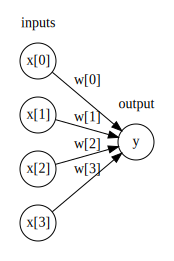

In [5]:
display(mglearn.plots.plot_logistic_regression_graph())

- input - 입력 특성, 연결선 - 학습된 계수(가중치, w), output - 입력의 가중치 합

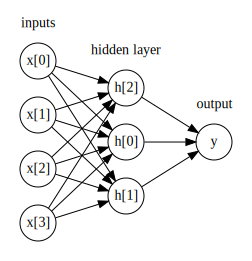

In [7]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- 은닉층이 하나인 다층 퍼셉트론

## 활성화 함수(Activation Function)
각 은닉 유닛의 가중치 합을 계산한 후, 그 결과에 비선형 함수를 적용 (함수 결과의 가중치 합을 계산하여 출력 y헷을 만듬)
1. 렐루(Relu:Rectified Linear Unit): 0이하면 0을 반환, 0보다 크면 값 그대로 반환
    - 최근 가장 많이 사용되는 활성화 함수
    - sigmoid, tanh 함수와 비교시 학습이 훨씬 빨라짐
    - 연산 비용이 크지않고, 구현이 매우 간단
    - x < 0인 값들에 대해서는 기울기가 0이기 때문에 뉴런이 죽을 수 있는 단점이 존재
2. 하이퍼볼릭 탄젠트(tanh: Hyperbolic Tangent): 낮은 입력값에 대해 -1로 수렴, 큰 입력값에 대해 +1로 수렴
    - 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결함
    - 하지만 미분함수에 대해 일정값 이상 커질시 미분값이 소실되는 gradient vanishing 문제는 여전히 남아있음
3. 시그모이드(sigmoid): 로지스틱 함수로도 불림
    - 함수 값이 0, 1로 제한
    - 중간 값은 1/2이다.
    - 매우 큰 값을 가지면 함수값은 거의 1이며, 매우 작은 값을 가지면 거의 0이다
    - 하지만, 아래 단점 때문에 거의 사용하지 않음
        - input값이 일정이상 올라가면 미분값이 거의 0에 수렴하게됨 => 미분값 소실
        - 함수값 중심이 0이 아니라 학습이 느려질 수 있다
4. Leakly ReLU
    - leakly ReLU는 ReLU의 뉴런이 죽는(“Dying ReLu”)현상을 해결하기위해 나온 함수
    - 음수의 x값에 대해 미분값이 0되지 않는다는 점을 제외하면 ReLU와 같은 특성을 가짐
5. Exponential Linear Unit(ELU)
    - ELU는 비교적 가장 최근에 나온 함수
    - ReLU의 모든 장점을 포함
    - 'Dying ReL' 문제를 해결함
    - 출력값이 거의 zero-centered에 가까움
    - 일반적인 ReLU와 달리 exp함수를 계산하는 비용이 발생

결론
- 가장 많이 사용되는 함수는 ReLU. 간단하고 사용이 쉽기 때문에 우선적으로 ReLU를 사용하자
- ReLU를 사용한 이후 Leakly ReLU등 ReLU계열의 다른 함수도 사용 해본자
- sigmoid의 경우에는 사용하지 않도록 하자
- tanh의 경우도 큰 성능은 나오지 않음

Text(0, 0.5, 'relu(x), tanh(x)')

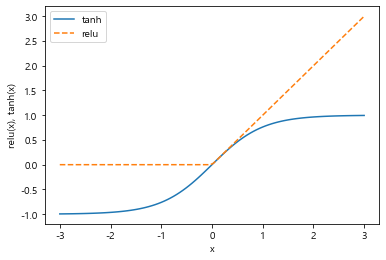

In [8]:
# Relu, tanh
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

## 은닉층
- 훈련 데이터에서 학습
    - w: 입력 x와 은닉층 h사이의 가중치
    - v: 은닉층 h와 출력 y헷 사이의 가중치

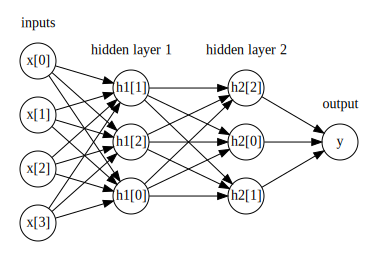

In [10]:
# 은닉층 추가
mglearn.plots.plot_two_hidden_layer_graph()

## 신경망 튜닝
- 활성화 함수 종류 
- 은닉 유닛 개수
    - 설정해야하는 중요 매개변수: **은닉층 유닛 개수**
    - 소규모 데이터셋일 경우 10개정도도 괜찮음
    - 매우 복잡한 데이터 셋에서는 10,000개가 될 수도
- 은닉층 개수
- alpha 규제
- 드롭아웃(dropout): 은닉층 유닛의 일부를 랜덤하게 작동시키지 않으므로써, 마치 서로 다른 많은 신경망을 앙상블 시키는 것과 같은 효과를 내어 '과대적합'을 방지

### 은닉 유닛 개수, 은닉층 개수, 활성화 함수 종류변경에 따른 결정 경계 변화

Text(0, 0.5, '특성 1')

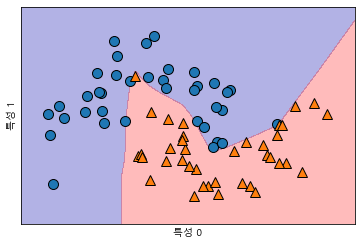

In [11]:
# two_moons data set # MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 은닉 유닛 100개인 신경망으로 학습  # 기본 활성화 함수: Relu
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)  # MLP 은닉 유닛 기본값: 100개  # solver 기본값: adam
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

- 비선형적이지만 비교적 매끄러운 결정 경계 만들어짐
- 하지만 은닉 유닛 100개는 작은 데이터세에서 과도함

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

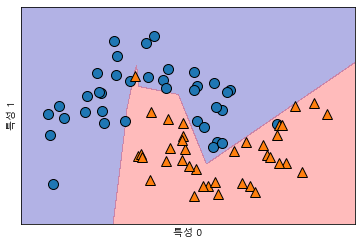

In [12]:
# 은닉 유닛 10개 신경망으로 학습
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

- 최적화에는 도달하지 못했지만, 여전히 준수한 결정 경계
- 은닉 유닛 100개일 때보다 결정 경계가 조금 더 날카로워짐

Text(0, 0.5, '특성 1')

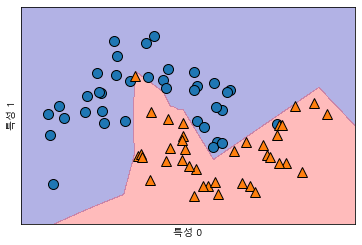

In [13]:
# 은닉 유닛 10개 + (은닉층 + 1 총 2개로) 신경망으로 학습
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

- 은닉층 개수 추가로 결정 경계가 약간 부드러워짐

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성 1')

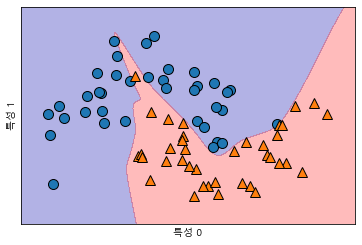

In [14]:
# 은닉 유닛 10개 + (은닉층 + 1 총 2개로) + 활성화 함수 'tanh'로 변경한 신경망으로 학습
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

- tanh 활성화함수로 변경하니 결정 경계가 더 뾰족해짐

### alpha - L2패널티 이용한 복잡도 제어
- 리지 회귀와 선형 분류기처럼 l2 패널티를 사용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도 제어 가능
- alpha 매개변수(선형회귀와 같음)로 제어
    - MLP에서 alpha기본값 0.0001로 매우 낮음 (규제가 거의 없음)

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


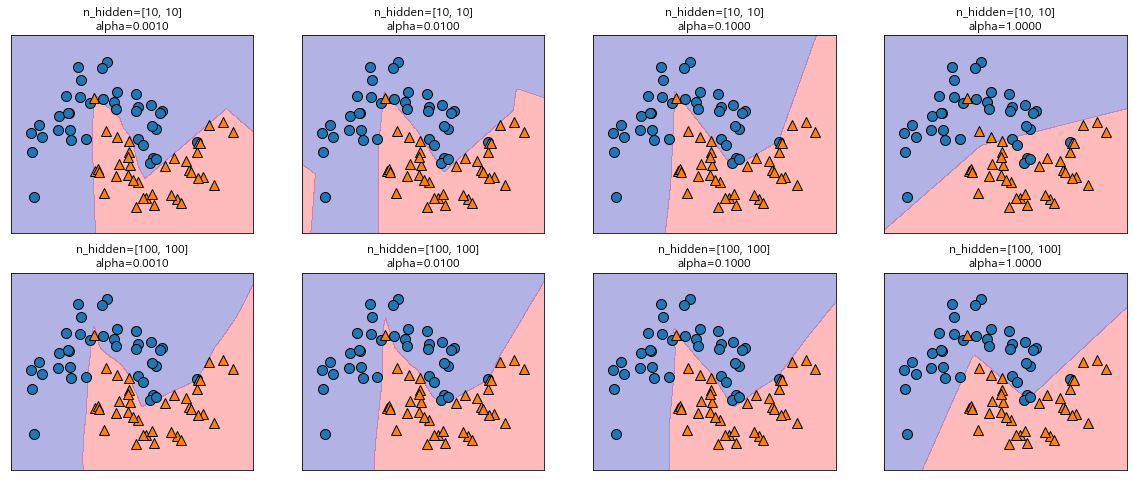

In [16]:
# 은닉 유닛 10, 100개인 은닉층 2개 사용 - alpha값에 따른 변화
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

- alpha값이 커질 수록 규제가 강해져 결정 경계가 부드럽, 완만해짐
- 은닉 유닛 개수가 많아질 수록 하나의 데이터 포인트에 민감해져 뾰족해짐

## 초깃값
- 신경망에서 학습을 시작하기 전에 가중치를 무작위로 설정함 -> 이 무작위한 초기화가 모델 학습에 영향을 줌
- 같은 매개변수를 사용하더라도 초깃값이 다르면 모델이 많이 달라질 수도
- 하지만 신경망이 크고 적절하면 초기값에 따른 영향 적음

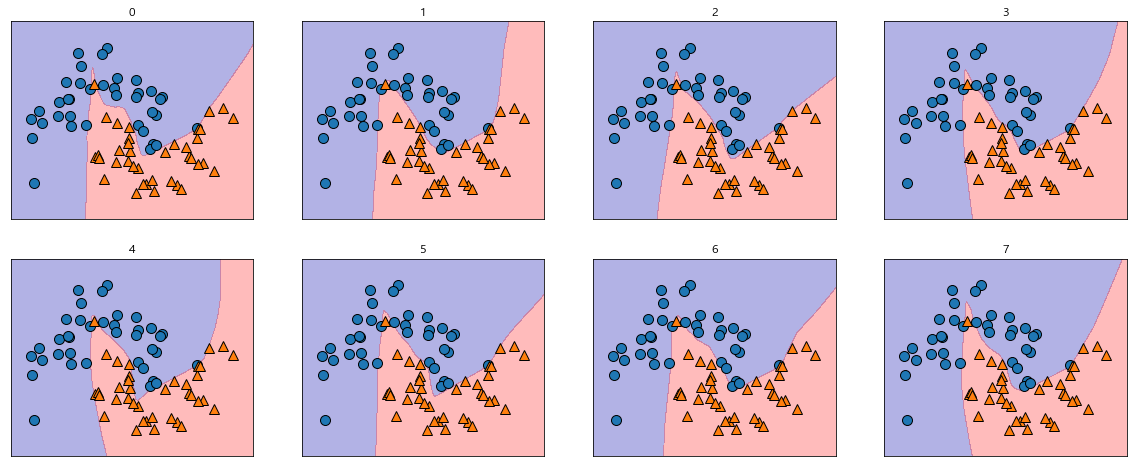

In [18]:
# 무작위로 다른 초깃값을 주되, 같은 매개변수로 학습한 결정 경계
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title(f'{i}')

## 스케일링
- svm과 같이 데이터 스케일링이 영향을 미쳐, 신경망도 모든 입력 특성을 평균을 0, 분산은 1이 되도록 변형하는 게 좋음(StandardScaler)

In [22]:
# cancer datas set 
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print('유방암 데이터의 특성별 최댓값:\n', cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [25]:
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_train, y_train)))
print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
훈련 세트 정확도: 0.92


- 정확도가 꽤 높지만, 다른 모델에 비해 낮은 수준

In [27]:
# StandardScaler 직접 구현

# train set 각 특성의 평균 계산
mean_on_train = X_train.mean(axis=0)
# train set 각 특성의 표준 편차 계산
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 뺴고 표준 편차로 나누면, 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train
# train set의 평균, 표준편차를 이용해, test set에도 같은 변환 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- 스케일링 전보다 성능이 좋아짐
- MLP의 solver 매개변수의 기본값이 adam. max_iter 매개변수 기본값 200  -> 반복횟수 더 늘리라는 경고의 원인
    - solver가 'sgd' or 'adam'일때
        - early_stopping을 True로 설정하면, 검증 점수가 n회 동안 향상되지 않을 경우 자동으로 조기 종료
            - n_iter_no_change: 조기 종료를 위한 검증점수 향상되지 않는 반복 횟수 n회 지정
            - validation_fraction: 검증 데이터 비율 설정 (기본값 0.1)

In [28]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


- 반복 횟수를 늘려 성능 향상됨
- 하지만, 테스트 세트의 정확도를 더 높이기 위해, 모델의 복잡도를 낮춰보자!

In [29]:
# alpha 매개변수 더 크게함으로써 모델의 복잡도 낮추기
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)  # 기본값 0.0001 
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


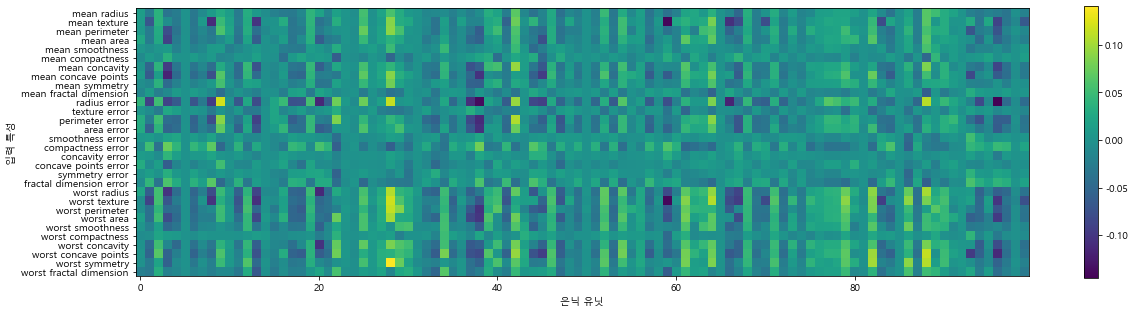

In [30]:
# 입력과 은닉층 사이의 학습된 가중치 시각화
plt.figure(figsize=(20, 5))
# mlp.coefs_[0]: 입력과 은닉층 사이 가중치(30, 100), 
# mlp.coefs_[1]: 은닉층과 출력 사이 가중치(100,1)
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')  
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()

- 행은 30개 입력 특성, 열은 100개의 은닉 유닛
- 밝은색은 큰 양수값, 어두운 색은 음수값
- 모든 은닉 유닛에서 작은 가중치를 가진 특성은 모델에서 덜 중요하다고 추론 가능
- 가중치가 0에 가까운 몇몇 특성은 밋밋한 색깔로 히트맵에 가로줄을 만드는 것 같은 느낌을 줌